In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

In [71]:
np.random.seed(42)

dates = pd.date_range(start="1995-01-01", end="2025-12-31", freq="D")

base_revenue = 8000  # daily base revenue
trend = np.linspace(0, 4000, len(dates))
weekly_seasonality = 1200 * np.sin(2 * np.pi * dates.dayofweek / 7)
yearly_seasonality = 2500 * np.sin(2 * np.pi * dates.dayofyear / 365)

noise = np.random.normal(0, 600, len(dates))

revenue = base_revenue + trend + weekly_seasonality + yearly_seasonality + noise

df = pd.DataFrame({
    "ds": dates,
    "y": revenue
})

df.head()


,ds,y
0,1995-01-01,7402.864103
1,1995-01-02,8003.448743
2,1995-01-03,9456.566659
3,1995-01-04,10256.797359
4,1995-01-05,8596.493637


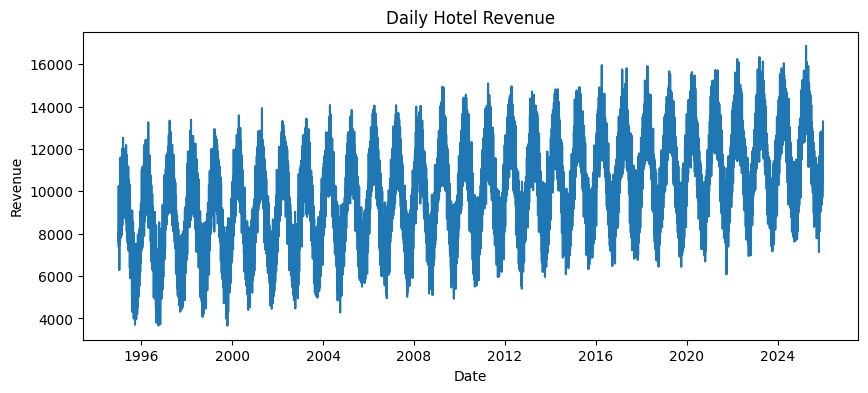

In [72]:
plt.figure(figsize=(10,4))
plt.plot(df["ds"], df["y"])
plt.title("Daily Hotel Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()


In [73]:
model = Prophet(
    daily_seasonality=False,     # handled via weekly
    weekly_seasonality=True,
    yearly_seasonality=True,
    seasonality_mode="additive",
    changepoint_prior_scale=0.1  # controls trend flexibility
)


In [74]:
model.fit(df)


07:21:13 - cmdstanpy - INFO - Chain [1] start processing
07:21:15 - cmdstanpy - INFO - Chain [1] done processing


In [75]:
def forecast_revenue(days_ahead):
    future = model.make_future_dataframe(periods=days_ahead, freq="D")
    forecast = model.predict(future)
    return forecast


In [76]:
forecast = forecast_revenue(365)

forecast.tail(10)[["ds", "yhat", "yhat_lower", "yhat_upper"]]


,ds,yhat,yhat_lower,yhat_upper
11678,2026-12-22,12667.383045,11955.135699,13475.492033
11679,2026-12-23,12908.145334,12132.121628,13639.585802
11680,2026-12-24,12283.400261,11535.640170,13096.458497
11681,2026-12-25,11335.319346,10607.552203,12111.176123
11682,2026-12-26,10718.774331,9944.485910,11472.838264
11683,2026-12-27,10979.416364,10231.899386,11739.662986
11684,2026-12-28,11968.452427,11167.580642,12699.255689
11685,2026-12-29,12966.954968,12183.327660,13748.197595
11686,2026-12-30,13203.952282,12424.390587,13938.802005
11687,2026-12-31,12575.580233,11753.514440,13373.636495


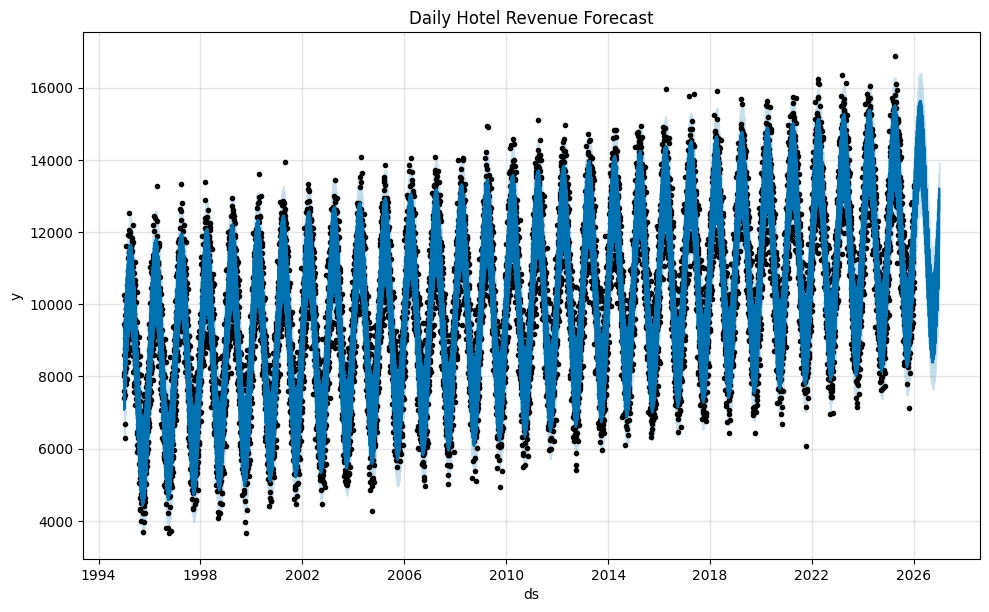

In [77]:
model.plot(forecast)
plt.title("Daily Hotel Revenue Forecast")
plt.show()


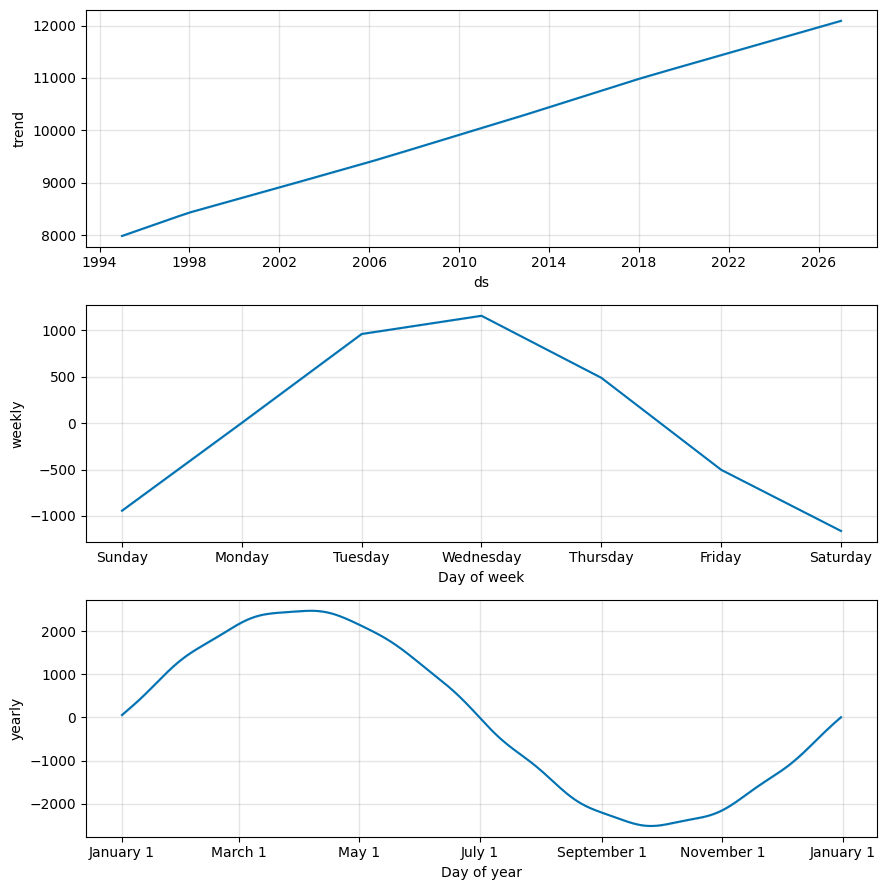

In [78]:
model.plot_components(forecast)
plt.show()


In [79]:
prediction_output = forecast[["ds", "yhat"]].tail(365)
prediction_output["date"] = prediction_output["ds"].dt.date
prediction_output["predicted_revenue"] = prediction_output["yhat"].round(2)

prediction_output = prediction_output[["date", "predicted_revenue"]]
prediction_output.head()


,date,predicted_revenue
11323,2026-01-01,12502.82
11324,2026-01-02,11551.18
11325,2026-01-03,10931.63
11326,2026-01-04,11189.94
11327,2026-01-05,12177.39


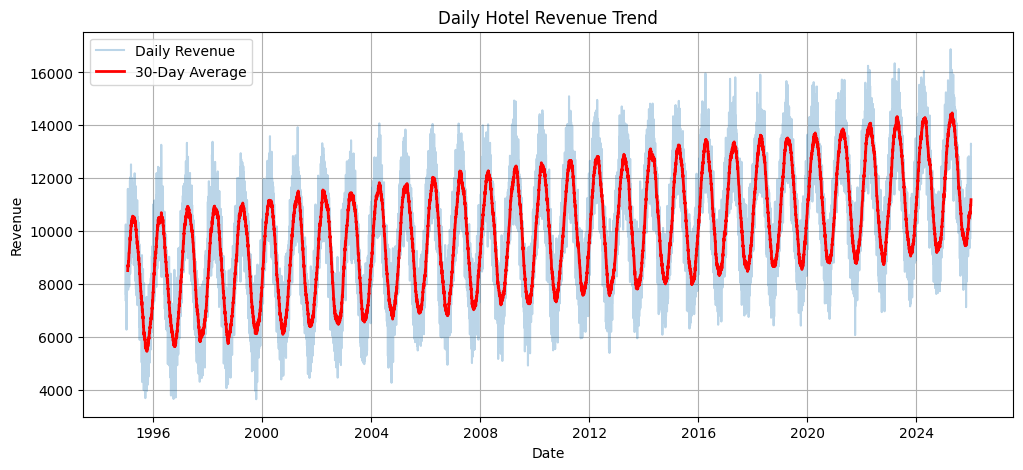

In [80]:
df["rolling_30"] = df["y"].rolling(window=30).mean()

plt.figure(figsize=(12,5))
plt.plot(df["ds"], df["y"], alpha=0.3, label="Daily Revenue")
plt.plot(df["ds"], df["rolling_30"], color="red", linewidth=2, label="30-Day Average")
plt.title("Daily Hotel Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.grid(True)
plt.show()


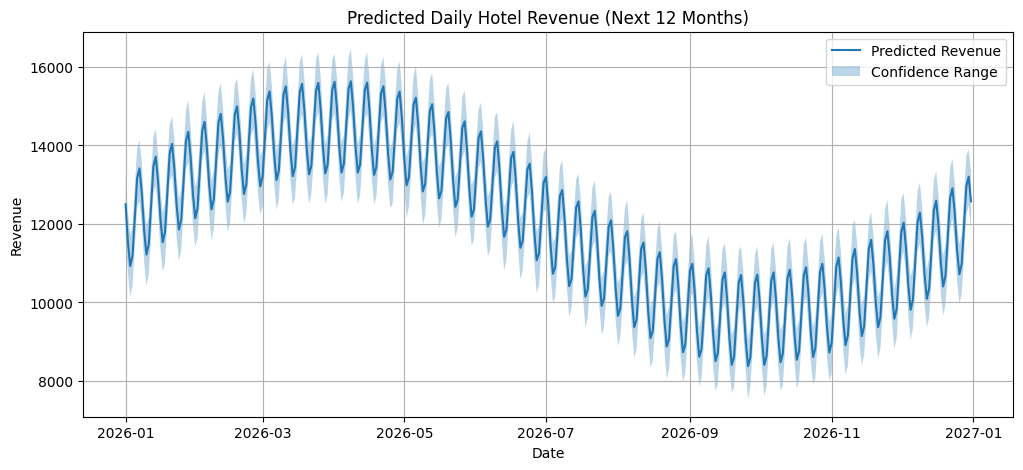

In [81]:
future_days = 365
forecast = forecast_revenue(future_days)

future_forecast = forecast.tail(future_days)

plt.figure(figsize=(12,5))
plt.plot(future_forecast["ds"], future_forecast["yhat"], label="Predicted Revenue")
plt.fill_between(
    future_forecast["ds"],
    future_forecast["yhat_lower"],
    future_forecast["yhat_upper"],
    alpha=0.3,
    label="Confidence Range"
)

plt.title("Predicted Daily Hotel Revenue (Next 12 Months)")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.grid(True)
plt.show()


In [82]:
monthly_df = df.copy()
monthly_df["month"] = monthly_df["ds"].dt.to_period("M")
monthly_revenue = monthly_df.groupby("month")["y"].sum().reset_index()
monthly_revenue["month"] = monthly_revenue["month"].dt.to_timestamp()


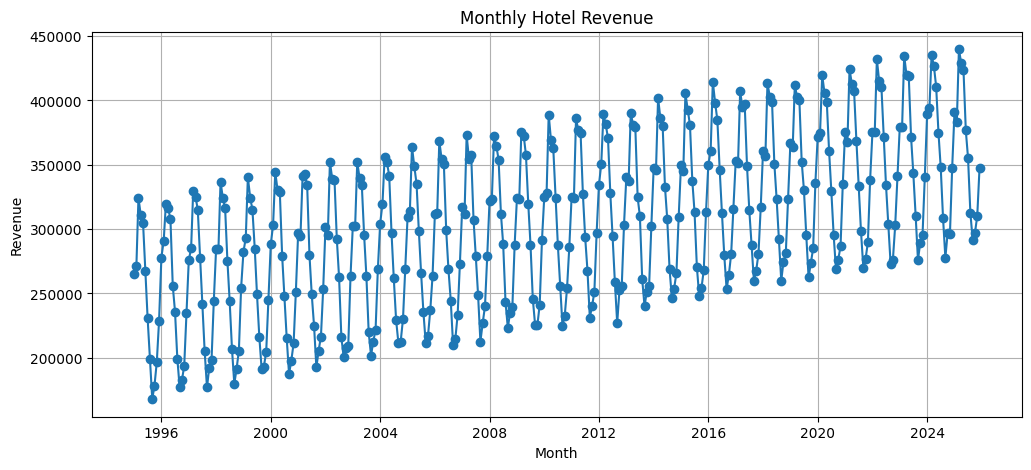

In [83]:
plt.figure(figsize=(12,5))
plt.plot(monthly_revenue["month"], monthly_revenue["y"], marker="o")
plt.title("Monthly Hotel Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()


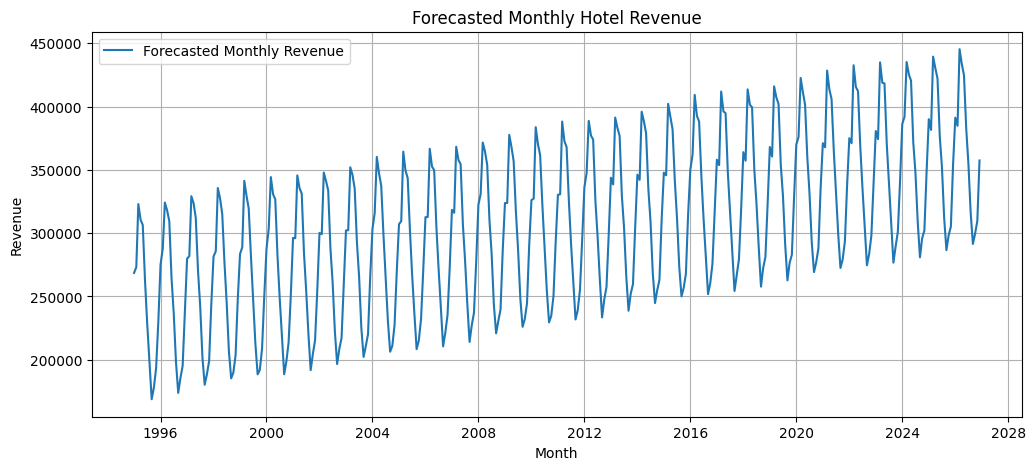

In [84]:
forecast["month"] = forecast["ds"].dt.to_period("M")
monthly_forecast = forecast.groupby("month")["yhat"].sum().reset_index()
monthly_forecast["month"] = monthly_forecast["month"].dt.to_timestamp()

plt.figure(figsize=(12,5))
plt.plot(monthly_forecast["month"], monthly_forecast["yhat"], label="Forecasted Monthly Revenue")
plt.title("Forecasted Monthly Hotel Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.legend()
plt.grid(True)
plt.show()


Enter number of years to predict:  5



Future Monthly Revenue Forecast:



,month,predicted_revenue
0,2026-01-01,391180.42
1,2026-02-01,384775.18
2,2026-03-01,445256.24
3,2026-04-01,433522.45
4,2026-05-01,424704.38
5,2026-06-01,382504.23
6,2026-07-01,354867.69
7,2026-08-01,316227.29
8,2026-09-01,291472.47
9,2026-10-01,299538.68


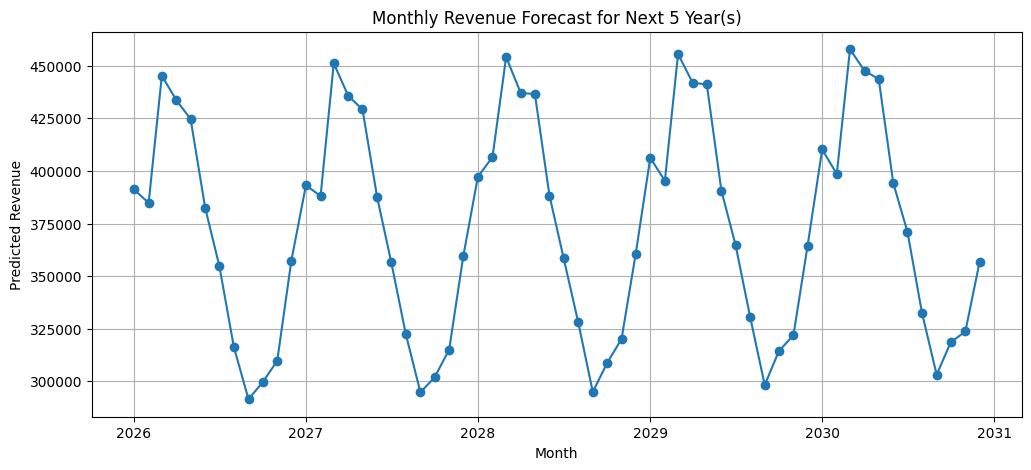

In [85]:
# ===== USER INPUT =====
years_ahead = int(input("Enter number of years to predict: "))

# Convert years to days
days_ahead = years_ahead * 365

# Generate forecast
future = model.make_future_dataframe(periods=days_ahead, freq="D")
forecast = model.predict(future)

# Extract future-only data
future_forecast = forecast.tail(days_ahead)[["ds", "yhat"]]

# Convert to monthly revenue
future_forecast["month"] = future_forecast["ds"].dt.to_period("M")
monthly_forecast = (
    future_forecast
    .groupby("month")["yhat"]
    .sum()
    .reset_index()
)

monthly_forecast["month"] = monthly_forecast["month"].dt.to_timestamp()
monthly_forecast["predicted_revenue"] = monthly_forecast["yhat"].round(2)
monthly_forecast = monthly_forecast[["month", "predicted_revenue"]]

# ===== DISPLAY TABLE =====
print("\nFuture Monthly Revenue Forecast:\n")
display(monthly_forecast)

# ===== VISUALIZATION =====
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(
    monthly_forecast["month"],
    monthly_forecast["predicted_revenue"],
    marker="o"
)

plt.title(f"Monthly Revenue Forecast for Next {years_ahead} Year(s)")
plt.xlabel("Month")
plt.ylabel("Predicted Revenue")
plt.grid(True)
plt.show()


In [86]:
import pickle
import os

output_path = "/kaggle/working/hotel_daily_revenue_prophet.pkl"

with open(output_path, "wb") as f:
    pickle.dump(model, f)

os.path.getsize(output_path)


1018589